<a href="https://colab.research.google.com/github/jmren168/PdM/blob/master/NRF03_GBDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import load_digits # digit dataset

# load dataset
digits = load_digits()

# features and target
X = digits.data
y = digits.target

print('# of classes: {:d} '.format(len(np.unique(y))))
print('# of features: {:d} '.format(X.shape[1]))
print('# of samples: {:d}'.format(X.shape[0]))

# of classes: 10 
# of features: 64 
# of samples: 1797


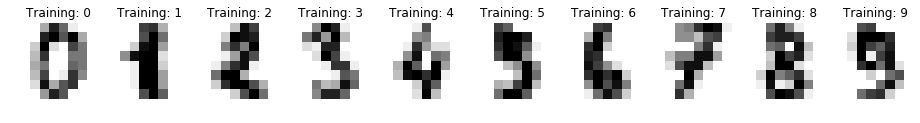

In [0]:
# Ref: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

import matplotlib.pyplot as plt # plot figures

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(16,5))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier # GBDT for classification
from sklearn.model_selection import train_test_split # split訓練及測試資料

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0) # 依2:1隨機切割出training set and test set

# fit data
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3) # n_estimators: 樹的個數, max_depth: 每棵決策樹的深度
clf.fit(X_train, y_train)

# outside prediction
y_pred_test = clf.predict(X_test)

# inside prediction
y_pred_train = clf.predict(X_train)

# calculate performance
acc_outside = sum((y_test - y_pred_test)==0) / len(y_test) * 100
acc_inside = sum((y_train - y_pred_train)==0) / len(y_train) * 100

print('GBDT')
print("inside accuracy: {:.2f}%".format(acc_inside))
print("outside accuracy: {:.2f}%".format(acc_outside))

GBDT
inside accuracy: 100.00%
outside accuracy: 93.32%
